In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tqdm import tqdm
%matplotlib inline


In [21]:
def TD_Eligibility_Trace_1987(gamma, beta, c, x, n_time_steps, n_nums, n_components, start_time_step, end_time_step, R, w, value):
    
    xbar = np.zeros((n_time_steps+1, n_nums, n_components))
    delta = np.zeros(n_time_steps)
    
    t = start_time_step
    
    xbar[t] = beta * 0 + (1-beta) * 0 # xbar[-1] = 0, x[-1] = 0
        
    while t < end_time_step: 
        value[t] = np.sum(np.diagonal(np.dot(w,x[t].T))) 
                
        if t > 0: 
            delta[t] = R[t] + gamma * np.sum(np.diagonal(np.dot(w,x[t].T))) - np.sum(np.diagonal(np.dot(w,x[t-1].T)))
        
        w += c * delta[t] * xbar[t]
        
        t = t + 1 
        
        if t < end_time_step:
            xbar[t] = beta * xbar[t-1] + (1-beta) * x[t-1]


In [22]:
def figure_14_2_Presence_1():
    
    N_COMPONENTS = 2
    
    N_NUMS = 1 # in present model only, the states has no series compound, so the value is 1
    
    TOTAL_TIME_STEPS = 14

    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 2 and t < 6:
            S_AT_EACH_TIME_STEP[t][0][0] = 1
        if t >= 6 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][1] = 1

    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    REWARDS[10] = 1
    REWARDS[11] = 1

    FIRST_STEP_TIME = 0
    
    # count from 0, then the 45th step should be the 44th
    END_STEP_TIME = TOTAL_TIME_STEPS

    TRIALS_NUMBER = 80


    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        w = np.zeros((N_NUMS,N_COMPONENTS))
        for trial in range(trials):
            w_trials[trial] = w
            TD_Eligibility_Trace_1987(gamma=0.95, beta=0.8, c=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w, \
                                      value=values[trial])
        w_trials[trials] = w

    trialnum=np.arange(TRIALS_NUMBER+1)
#     fig = plt.figure()
#     ax = fig.add_subplot(121)
#     ax.plot(trialnum, w_trials[:,0,0], label='CSB PRESENT')
    plt.plot(trialnum, w_trials[:,0,0], label='CSB PRESENT')

    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 1 and t < 3:
            S_AT_EACH_TIME_STEP[t][0][0] = 1
        
    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        w = np.zeros((N_NUMS,N_COMPONENTS))
        for trial in range(trials):
            w_trials[trial] = np.copy(w)
            TD_Eligibility_Trace_1987(gamma=0.95, beta=0.8, c=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w)

    trialnum=np.arange(TRIALS_NUMBER+1)
#     ax.plot(trialnum, w_trials[:,0,0], label='CSB ABSENT')
    plt.plot(trialnum, w_trials[:,0,0], label='CSB ABSENT')
    
#     plt.ylim(0.0,1.3)

#     x = np.linspace(0, 15)
#     scale_x = 1e-9
#     scale_y = 10

#     ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
#     ax.yaxis.set_major_formatter(ticks_y)

#     ax.set_xlabel('TRIALS')
#     ax.set_ylabel('wCSA')
#     ax.legend()
    plt.yticks(np.arange(0, 1.4, step=1.3))
    plt.xlabel('TRIALS')
    plt.ylabel('wCSA')
    plt.legend()
    plt.show()
    

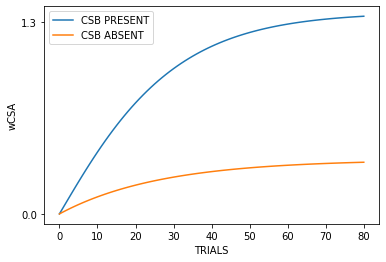

In [23]:
figure_14_2_Presence_1()


In [24]:
def figure_14_2_Presence_2():
    
    N_COMPONENTS = 2
    
    N_NUMS = 1 # in present model only, the states has no series compound, so the value is 1
    
    TOTAL_TIME_STEPS = 14
    
    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 6 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][1] = 1

    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    REWARDS[10] = 1
    REWARDS[11] = 1
    
    FIRST_STEP_TIME = 0
    
    # count from 0, then the 45th step should be the 44th
    END_STEP_TIME = TOTAL_TIME_STEPS

    TRIALS_NUMBER = 80

    trialnum=np.arange(TRIALS_NUMBER+1)

    plt.figure()    

    
    
    w1 = np.zeros((N_NUMS,N_COMPONENTS))
                
    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        
        for trial in range(trials):
            w_trials[trial] = np.copy(w1)
            TD_Eligibility_Trace_1987(gamma=0.95, beta=0.8, c=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w1, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w1)
    
    plt.plot(trialnum, w_trials[:,0,1], label='CSA ABSENT')

    
    
    w2 = np.zeros((N_NUMS,N_COMPONENTS))
    
    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 2 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][0] = 1
        if t >= 6 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][1] = 1
                        
    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        
        for trial in range(trials):
            w_trials[trial] = np.copy(w2)
            TD_Eligibility_Trace_1987(gamma=0.95, beta=0.8, c=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w2, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w2)
            
    plt.plot(trialnum, w_trials[:,0,1], label='CSA PRESENT')

    plt.yticks(np.arange(0, 1.7, step=1.6))
    plt.xlabel('TRIALS')
    plt.ylabel('wCSB')
    plt.legend()
    
    #########################################
        
    w2 = np.copy(w1)
    
    plt.figure()
    
    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 6 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][1] = 1
            
    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        for trial in range(trials):
            w_trials[trial] = np.copy(w1)
            TD_Eligibility_Trace_1987(gamma=0.95, beta=0.8, c=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w1, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w1)

    plt.plot(trialnum, w_trials[:,0,1], label='CSA ABSENT')
        
    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 2 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][0] = 1
        if t >= 6 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][1] = 1
                        
    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        for trial in range(trials):
            w_trials[trial] = np.copy(w2)
            TD_Eligibility_Trace_1987(gamma=0.95, beta=0.8, c=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w2, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w2)

    plt.plot(trialnum, w_trials[:,0,1], label='CSA PRESENT')
        
    plt.yticks(np.arange(0, 1.7, step=1.6))
    plt.xlabel('TRIALS')
    plt.ylabel('wCSB')
    plt.legend()
    
    plt.show()
    

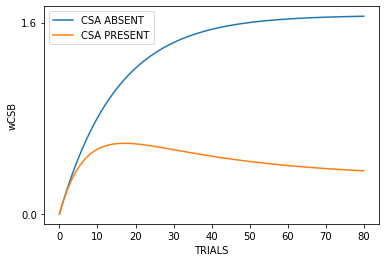

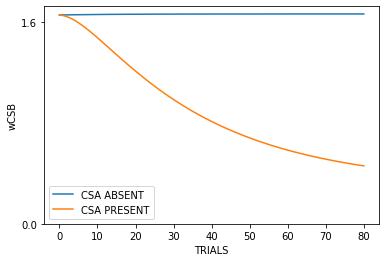

In [25]:
figure_14_2_Presence_2()


In [26]:
def figure_14_2_Presence_3():
    
    N_COMPONENTS = 2
    
    N_NUMS = 1 # in present model only, the states has no series compound, so the value is 1
    
    TOTAL_TIME_STEPS = 22
    
    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 10 and t < 18:
            S_AT_EACH_TIME_STEP[t][0][1] = 1
            
    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    REWARDS[18] = 1
    REWARDS[19] = 1
    
    FIRST_STEP_TIME = 0
    
    # count from 0, then the 45th step should be the 44th
    END_STEP_TIME = TOTAL_TIME_STEPS

    TRIALS_NUMBER = 80
        
#     plt.figure()    
    
    w1 = np.zeros((N_NUMS,N_COMPONENTS))

    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        
        for trial in range(trials):
            w_trials[trial] = np.copy(w1)
            TD_Eligibility_Trace_1987(gamma=0.95, beta=0.8, c=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w1, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w1)
    
#     trialnum=np.arange(TRIALS_NUMBER+1)

#     plt.plot(trialnum, w_trials[:,0,0], label='CSA')
#     plt.plot(trialnum, w_trials[:,0,1], label='CSB')

#     plt.xlabel('TRIALS')
#     plt.ylabel('w')
#     plt.legend()
    
    #########################################
    
    TRIALS_NUMBER = 50
    
#     plt.figure()
    
    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 2 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][0] = 1

        if t >= 10 and t < 18:
            S_AT_EACH_TIME_STEP[t][0][1] = 1
            
    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    
    trialnum=np.arange(50)
    
    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        
        for trial in range(trials):
            w_trials[trial] = np.copy(w1)
            TD_Eligibility_Trace_1987(gamma=0.95, beta=0.8, c=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w1, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w1)
    
    trialnum=np.arange(TRIALS_NUMBER+1)
    plt.plot(trialnum, w_trials[:,0,0], label='CSA')
    plt.plot(trialnum, w_trials[:,0,1], label='CSB')
    
    plt.yticks(np.arange(0, 1.7, step=1.6))
    plt.xlabel('TRIALS')
    plt.ylabel('w')
    plt.legend()

    plt.show()
    

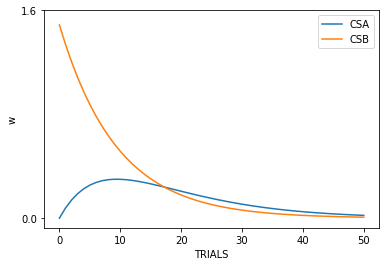

In [27]:
figure_14_2_Presence_3()


In [28]:
def figure_3_Paper():
    
    N_COMPONENTS = 1
    
    N_NUMS = 1 # in present model only, the states has no series compound, so the value is 1
    
    TOTAL_TIME_STEPS = 14

    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 2 and t < 6:
            S_AT_EACH_TIME_STEP[t][0][0] = 1

    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    REWARDS[10] = 1
    REWARDS[11] = 1

    FIRST_STEP_TIME = 0
    
    # count from 0, then the 45th step should be the 44th
    END_STEP_TIME = TOTAL_TIME_STEPS

    TRIALS_NUMBER = 170


    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        w = np.zeros((N_NUMS,N_COMPONENTS))
        for trial in range(trials):
            if trial > 70:
                REWARDS = np.zeros(TOTAL_TIME_STEPS)
            w_trials[trial] = w
            TD_Eligibility_Trace_1987(gamma=0.95, beta=0.8, c=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w, \
                                      value=values[trial])
        w_trials[trials] = w

    trialnum=np.arange(TRIALS_NUMBER+1)
#     fig = plt.figure()
#     ax = fig.add_subplot(121)
#     ax.plot(trialnum, w_trials[:,0,0], label='CSB PRESENT')
    plt.plot(trialnum, w_trials[:,0,0], label='CS')

    plt.yticks(np.arange(0, 1.7, step=1.6))
    plt.xlabel('TRIALS')
    plt.ylabel('w')
    plt.legend()
    plt.show()
    

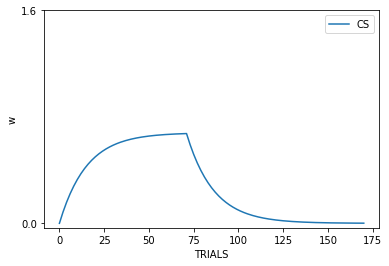

In [29]:
figure_3_Paper()


In [30]:
def figure_4_Paper():
    
    N_COMPONENTS = 1
    
    N_NUMS = 1 # in present model only, the states has no series compound, so the value is 1
    
    TOTAL_TIME_STEPS = 14

    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 2 and t < 6:
            S_AT_EACH_TIME_STEP[t][0][0] = 1

    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    REWARDS[10] = 1
    REWARDS[11] = 1

    FIRST_STEP_TIME = 0
    
    # count from 0, then the 45th step should be the 44th
    END_STEP_TIME = TOTAL_TIME_STEPS

    TRIALS_NUMBER = 1700


    for trials in [TRIALS_NUMBER]:
        values = np.zeros((TRIALS_NUMBER,TOTAL_TIME_STEPS))
        w_trials = np.zeros((TRIALS_NUMBER+1,N_NUMS,N_COMPONENTS))
        w = np.zeros((N_NUMS,N_COMPONENTS))
        for trial in range(TRIALS_NUMBER):
            if trial > 700:
                REWARDS = np.zeros(TOTAL_TIME_STEPS)
            w_trials[trial] = w
            TD_Eligibility_Trace_1987(gamma=0.95, beta=0.8, c=0.01, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w, \
                                      value=values[trial])
        w_trials[trials] = w

    trialnum=np.arange(TRIALS_NUMBER+1)
#     fig = plt.figure()
#     ax = fig.add_subplot(121)
#     ax.plot(trialnum, w_trials[:,0,0], label='CSB PRESENT')
    plt.plot(trialnum, w_trials[:,0,0], label='CS')

    plt.yticks(np.arange(0, 1.7, step=1.6))
    plt.xlabel('TRIALS')
    plt.ylabel('w')
    plt.legend()
    plt.show()
    

In [31]:
def TD_Eligibility_Trace_2012(gamma, lambd, alpha, x, n_time_steps, n_nums, n_components, start_time_step, end_time_step, R, w, value):
    
    e = np.zeros((n_time_steps, n_nums, n_components))
    delta = np.zeros(n_time_steps)
    
    t = start_time_step
    
    while t < end_time_step:
        
        value[t] = np.sum(np.diagonal(np.dot(w,x[t].T)))
                
        if (t > 0):
            delta[t] = R[t] + gamma * np.sum(np.diagonal(np.dot(w,x[t].T))) - np.sum(np.diagonal(np.dot(w,x[t-1].T)))        
        
        w += alpha * delta[t] * e[t]

        if t < end_time_step - 1: 
            e[t+1] = gamma * lambd * e[t] + x[t] 

        t = t + 1
        

In [32]:
def figure_14_4_CSC():
    
    N_COMPONENTS = 1
    
    N_NUMS = 45

    TOTAL_TIME_STEPS = 45

    FIRST_STEP_TIME = 0
    
    # count from 0, then the 45th step should be the 44th
    END_STEP_TIME = TOTAL_TIME_STEPS - 1

    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 9 and t < 35:
            S_AT_EACH_TIME_STEP[t] = [[1] if x==t else [0] for x in range(0, TOTAL_TIME_STEPS)]

    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    REWARDS[35] = 1

    timestep=np.arange(-9,36)

    for trials in [25, 50, 200]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w = np.zeros((N_NUMS,N_COMPONENTS))
        for trial in range(trials):
            TD_Eligibility_Trace_2012(gamma=0.97, lambd=0.95, alpha=0.05, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w, \
                                      value=values[trial])

        print("values[trials-1,:]:",values[trials-1,:])
        if trials == 25:
            plt.plot(timestep, values[trials-1,:], 'r--', label='%d trials' % trials)
        if trials == 50:
            plt.plot(timestep, values[trials-1,:], 'g--', label='%d trials' % trials)
        if trials == 200:
            plt.plot(timestep, values[trials-1,:], 'b', label='%d trials' % trials)
    
    plt.yticks(np.arange(0, 1.1, step=0.2))
    plt.xlabel('Time Steps')
    plt.ylabel('US Prediction (V)')
    plt.legend()
    plt.show()


values[trials-1,:]: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.16337398 0.17351632 0.18426719
 0.19566137 0.20773554 0.22052828 0.2340802  0.24843404 0.26363475
 0.27972957 0.29676818 0.31480275 0.3338881  0.35408173 0.37544403
 0.3980383  0.42193093 0.44719149 0.47389282 0.50211121 0.53192646
 0.56342204 0.59668516 0.63180694 0.66888248 0.70801098 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
values[trials-1,:]: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.29937126 0.31392172 0.32911711
 0.34498173 0.36154048 0.37881883 0.39684287 0.41563924 0.43523513
 0.45565826 0.47693685 0.49909959 0.5221756  0.54619441 0.5711859
 0.59718025 0.62420787 0.65229939 0.68148554 0.71179708 0.74326474
 0.77591912 0.80979058 0.84490915 0.8813044  0.91900529 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
v

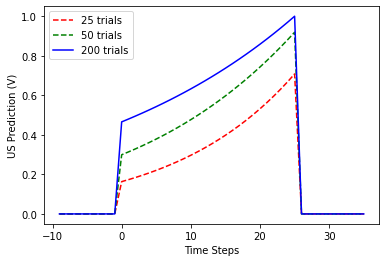

In [33]:
figure_14_4_CSC()


In [34]:
def figure_14_4_Present():
    
    N_COMPONENTS = 1
    
    N_NUMS = 1 # in present model only, the states has no series compound, so the value is 1
    
    TOTAL_TIME_STEPS = 45

    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 9 and t < 35:
            S_AT_EACH_TIME_STEP[t] = [[0.2]]

    FIRST_STEP_TIME = 0
    
    # count from 0, then the 45th step should be the 44th
    END_STEP_TIME = TOTAL_TIME_STEPS - 1

    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    REWARDS[35] = 1

    timestep=np.arange(-9,36)

    for trials in [25,50,200]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w = np.zeros((N_NUMS,N_COMPONENTS))
        for trial in range(trials):
            TD_Eligibility_Trace_2012(gamma=0.97, lambd=0.95, alpha=0.05, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w, \
                                      value=values[trial])

        print("values[trials-1,:]:",values[trials-1,:])
        if trials == 25:
            plt.plot(timestep, values[trials-1,:], 'r--', label='%d trials' % trials)
        if trials == 50:
            plt.plot(timestep, values[trials-1,:], 'g--', label='%d trials' % trials)
        if trials == 200:
            plt.plot(timestep, values[trials-1,:], 'b', label='%d trials' % trials)
    
    plt.yticks(np.arange(0, 1.1, step=0.2))
    plt.xlabel('Time Steps')
    plt.ylabel('US Prediction (V)')
    plt.legend()
    plt.show()
    

values[trials-1,:]: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.37441177 0.37441177 0.3743893
 0.37434614 0.37428391 0.37420411 0.37410815 0.37399729 0.37387273
 0.37373555 0.37358676 0.37342729 0.37325799 0.37307966 0.37289303
 0.37269875 0.37249746 0.37228972 0.37207606 0.37185696 0.37163286
 0.37140418 0.3711713  0.37093457 0.3706943  0.3704508  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
values[trials-1,:]: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.5443913  0.5443913  0.54435864
 0.54429588 0.5442054  0.54408938 0.54394985 0.54378866 0.54360755
 0.54340809 0.54319175 0.54295988 0.54271373 0.54245444 0.54218307
 0.5419006  0.54160792 0.54130587 0.54099521 0.54067664 0.5403508
 0.54001831 0.5396797  0.53933549 0.53898614 0.53863209 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
va

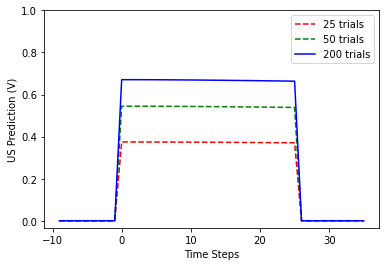

In [35]:
figure_14_4_Present()


In [36]:
def figure_14_4_MS():
    
    N_COMPONENTS = 1
    
    N_NUMS = 6 # in microstimulus representation, there are 6 micro stimuli
    
    TOTAL_TIME_STEPS = 300

    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS*2,N_COMPONENTS))
    
    trace = 1
    trace1 = 1
    decay = 0.985
    sigma = 0.08

    for t in range(0,TOTAL_TIME_STEPS):
#         if t >= 9 and t < 35:
        if t >= 9:
            for i in range(6):
                S_AT_EACH_TIME_STEP[t][i] = trace * (1 / np.sqrt(2*np.pi)) * np.exp(-((trace-((i+1)/N_NUMS))**2) / (2*(sigma**2)))
            trace *= decay
        if t>= 35:
            for i in range(6):
                S_AT_EACH_TIME_STEP[t][i+N_NUMS] = trace1 * (1 / np.sqrt(2*np.pi)) * np.exp(-((trace1-((i+1)/N_NUMS))**2) / (2*(sigma**2)))
            trace1 *= decay        
    
    
    FIRST_STEP_TIME = 0
    
    # count from 0, then the 45th step should be the 44th
    END_STEP_TIME = TOTAL_TIME_STEPS

    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    REWARDS[35] = 1
        
    timestep=np.arange(-9,36)

    for trials in [25,50,200]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w = np.zeros((N_NUMS*2,N_COMPONENTS))
        for trial in range(trials):
            TD_Eligibility_Trace_2012(gamma=0.97, lambd=0.95, alpha=0.05, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS*2, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w, \
                                      value=values[trial])

        print("values[trials-1,:]:",values[trials-1,0:50])
        if trials == 25:
            plt.plot(timestep, values[trials-1,0:45], 'r--', label='%d trials' % trials)
        if trials == 50:
            plt.plot(timestep, values[trials-1,0:45], 'g--', label='%d trials' % trials)
        if trials == 200:
            plt.plot(timestep, values[trials-1,0:45], 'b', label='%d trials' % trials)
    
    plt.yticks(np.arange(0, 1.1, step=0.2))
    plt.xlabel('Time Steps')
    plt.ylabel('US Prediction (V)')
    plt.legend()
    plt.show()
 

values[trials-1,:]: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.240787    0.26302365  0.2868898
  0.3132989   0.34263376  0.37453081  0.40784609  0.44080947  0.47131728
  0.49728667  0.51699607  0.52935218  0.53404283  0.53155344  0.52304732
  0.51013667  0.49459489  0.47807276  0.46187441  0.44682753  0.43325429
  0.42102728  0.40968161  0.39855297  0.38691573  0.37410279  0.21825315
  0.2225085   0.20544026  0.18827794  0.17045663  0.15165898  0.13187266
  0.11138208  0.09070502  0.07049687  0.05144653  0.03418133  0.01919201
  0.00678428 -0.00293969]
values[trials-1,:]: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.33476302  0.36231617  0.39112961
  0.4225726   0.45738463  0.49536315  0.53528933  0.57510626  0.61228692
  0.64429005  0.66900162  0.68508132  0.69215953  0.69085638  0.68262487
  0.66945428  0.65350116  0.63672874  0.62062689  0.60605575  0.59322048
  

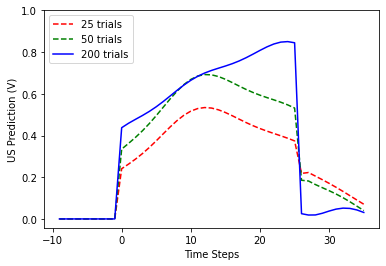

In [37]:
figure_14_4_MS()


In [40]:
def figure_14_2_Presence_1_2012():
    
    N_COMPONENTS = 2
    
    N_NUMS = 1 # in present model only, the states has no series compound, so the value is 1
    
    TOTAL_TIME_STEPS = 14

    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 2 and t < 6:
            S_AT_EACH_TIME_STEP[t][0][0] = 1
        if t >= 6 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][1] = 1

    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    REWARDS[10] = 1
    REWARDS[11] = 1

    FIRST_STEP_TIME = 0
    
    # count from 0, then the 45th step should be the 44th
    END_STEP_TIME = TOTAL_TIME_STEPS

    TRIALS_NUMBER = 80


    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        w = np.zeros((N_NUMS,N_COMPONENTS))
        for trial in range(trials):
            w_trials[trial] = w
            TD_Eligibility_Trace_2012(gamma=0.95, lambd=0.8, alpha=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w, \
                                      value=values[trial])
        w_trials[trials] = w

    trialnum=np.arange(TRIALS_NUMBER+1)
#     fig = plt.figure()
#     ax = fig.add_subplot(121)
#     ax.plot(trialnum, w_trials[:,0,0], label='CSB PRESENT')
    plt.plot(trialnum, w_trials[:,0,0], label='CSB PRESENT')

    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 1 and t < 3:
            S_AT_EACH_TIME_STEP[t][0][0] = 1
        
    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        w = np.zeros((N_NUMS,N_COMPONENTS))
        for trial in range(trials):
            w_trials[trial] = np.copy(w)
            TD_Eligibility_Trace_2012(gamma=0.95, lambd=0.8, alpha=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w)

    trialnum=np.arange(TRIALS_NUMBER+1)
#     ax.plot(trialnum, w_trials[:,0,0], label='CSB ABSENT')
    plt.plot(trialnum, w_trials[:,0,0], label='CSB ABSENT')
    
#     plt.ylim(0.0,1.3)

#     x = np.linspace(0, 15)
#     scale_x = 1e-9
#     scale_y = 10

#     ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
#     ax.yaxis.set_major_formatter(ticks_y)

#     ax.set_xlabel('TRIALS')
#     ax.set_ylabel('wCSA')
#     ax.legend()
    plt.yticks(np.arange(0, 1.4, step=1.3))
    plt.xlabel('TRIALS')
    plt.ylabel('wCSA')
    plt.legend()
    plt.show()
    

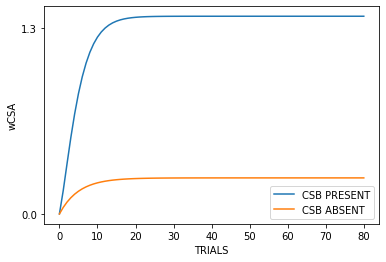

In [41]:
figure_14_2_Presence_1_2012()


In [42]:
def figure_14_2_Presence_2_2012():
    
    N_COMPONENTS = 2
    
    N_NUMS = 1 # in present model only, the states has no series compound, so the value is 1
    
    TOTAL_TIME_STEPS = 14
    
    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 6 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][1] = 1

    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    REWARDS[10] = 1
    REWARDS[11] = 1
    
    FIRST_STEP_TIME = 0
    
    # count from 0, then the 45th step should be the 44th
    END_STEP_TIME = TOTAL_TIME_STEPS

    TRIALS_NUMBER = 80

    trialnum=np.arange(TRIALS_NUMBER+1)

    plt.figure()    

    
    
    w1 = np.zeros((N_NUMS,N_COMPONENTS))
                
    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        
        for trial in range(trials):
            w_trials[trial] = np.copy(w1)
            TD_Eligibility_Trace_2012(gamma=0.95, lambd=0.8, alpha=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w1, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w1)
    
    plt.plot(trialnum, w_trials[:,0,1], label='CSA ABSENT')

    
    
    w2 = np.zeros((N_NUMS,N_COMPONENTS))
    
    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 2 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][0] = 1
        if t >= 6 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][1] = 1
                        
    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        
        for trial in range(trials):
            w_trials[trial] = np.copy(w2)
            TD_Eligibility_Trace_2012(gamma=0.95, lambd=0.8, alpha=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w2, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w2)
            
    plt.plot(trialnum, w_trials[:,0,1], label='CSA PRESENT')

    plt.yticks(np.arange(0, 1.7, step=1.6))
    plt.xlabel('TRIALS')
    plt.ylabel('wCSB')
    plt.legend()
    
    #########################################
        
    w2 = np.copy(w1)
    
    plt.figure()
    
    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 6 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][1] = 1
            
    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        for trial in range(trials):
            w_trials[trial] = np.copy(w1)
            TD_Eligibility_Trace_2012(gamma=0.95, lambd=0.8, alpha=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w1, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w1)

    plt.plot(trialnum, w_trials[:,0,1], label='CSA ABSENT')
        
    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 2 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][0] = 1
        if t >= 6 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][1] = 1
                        
    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        for trial in range(trials):
            w_trials[trial] = np.copy(w2)
            TD_Eligibility_Trace_2012(gamma=0.95, lambd=0.8, alpha=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w2, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w2)

    plt.plot(trialnum, w_trials[:,0,1], label='CSA PRESENT')
        
    plt.yticks(np.arange(0, 1.7, step=1.6))
    plt.xlabel('TRIALS')
    plt.ylabel('wCSB')
    plt.legend()
    
    plt.show()
    

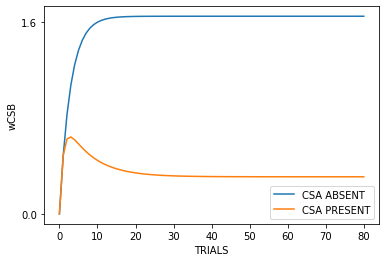

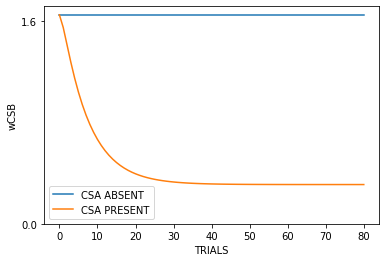

In [43]:
figure_14_2_Presence_2_2012()


In [44]:
def figure_14_2_Presence_3_2012():
    
    N_COMPONENTS = 2
    
    N_NUMS = 1 # in present model only, the states has no series compound, so the value is 1
    
    TOTAL_TIME_STEPS = 22
    
    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 10 and t < 18:
            S_AT_EACH_TIME_STEP[t][0][1] = 1
            
    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    REWARDS[18] = 1
    REWARDS[19] = 1
    
    FIRST_STEP_TIME = 0
    
    # count from 0, then the 45th step should be the 44th
    END_STEP_TIME = TOTAL_TIME_STEPS

    TRIALS_NUMBER = 80
        
#     plt.figure()    
    
    w1 = np.zeros((N_NUMS,N_COMPONENTS))

    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        
        for trial in range(trials):
            w_trials[trial] = np.copy(w1)
            TD_Eligibility_Trace_2012(gamma=0.95, lambd=0.8, alpha=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w1, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w1)
    
#     trialnum=np.arange(TRIALS_NUMBER+1)

#     plt.plot(trialnum, w_trials[:,0,0], label='CSA')
#     plt.plot(trialnum, w_trials[:,0,1], label='CSB')

#     plt.xlabel('TRIALS')
#     plt.ylabel('w')
#     plt.legend()
    
    #########################################
    
    TRIALS_NUMBER = 50
    
#     plt.figure()
    
    S_AT_EACH_TIME_STEP = np.zeros((TOTAL_TIME_STEPS,N_NUMS,N_COMPONENTS))

    for t in range(0,TOTAL_TIME_STEPS):
        if t >= 2 and t < 10:
            S_AT_EACH_TIME_STEP[t][0][0] = 1

        if t >= 10 and t < 18:
            S_AT_EACH_TIME_STEP[t][0][1] = 1
            
    REWARDS = np.zeros(TOTAL_TIME_STEPS)
    
    trialnum=np.arange(50)
    
    for trials in [TRIALS_NUMBER]:
        values = np.zeros((trials,TOTAL_TIME_STEPS))
        w_trials = np.zeros((trials+1,N_NUMS,N_COMPONENTS))
        
        for trial in range(trials):
            w_trials[trial] = np.copy(w1)
            TD_Eligibility_Trace_2012(gamma=0.95, lambd=0.8, alpha=0.1, \
                                      x=S_AT_EACH_TIME_STEP, \
                                      n_time_steps = TOTAL_TIME_STEPS, \
                                      n_nums=N_NUMS, n_components=N_COMPONENTS, \
                                      start_time_step=FIRST_STEP_TIME, end_time_step=END_STEP_TIME, \
                                      R=REWARDS, w=w1, \
                                      value=values[trial])
        w_trials[trials] = np.copy(w1)
    
    trialnum=np.arange(TRIALS_NUMBER+1)
    plt.plot(trialnum, w_trials[:,0,0], label='CSA')
    plt.plot(trialnum, w_trials[:,0,1], label='CSB')
    
    plt.yticks(np.arange(0, 1.7, step=1.6))
    plt.xlabel('TRIALS')
    plt.ylabel('w')
    plt.legend()

    plt.show()
    

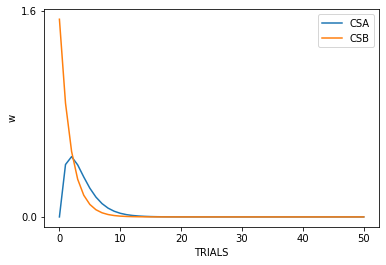

In [45]:
figure_14_2_Presence_3_2012()
